In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Datos de ejemplo: Años de experiencia vs. Sueldo
experiencia = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
sueldo = np.array([30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000])

In [3]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(experiencia, sueldo)

# Predicciones
experiencia_pred = np.linspace(0, 12, 100).reshape(-1, 1)
sueldo_pred = modelo.predict(experiencia_pred)


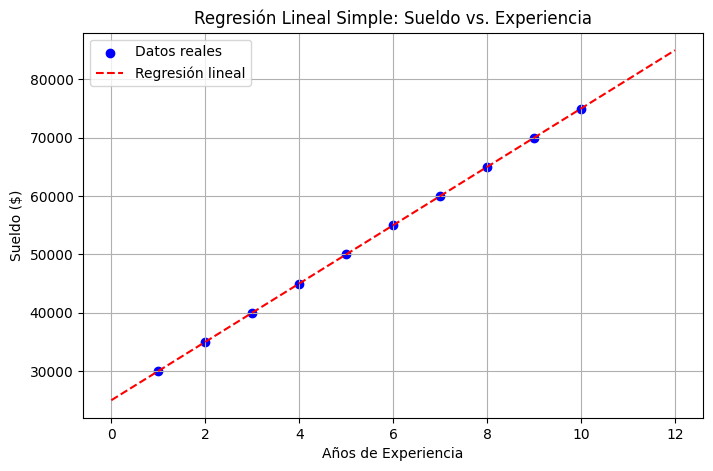

In [4]:
# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(experiencia, sueldo, color='blue', label='Datos reales')
plt.plot(experiencia_pred, sueldo_pred, color='red', linestyle='dashed', label='Regresión lineal')
plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo ($)')
plt.title('Regresión Lineal Simple: Sueldo vs. Experiencia')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error

# Predicciones del modelo sobre los datos reales
sueldo_pred_real = modelo.predict(experiencia)

# Cálculo del Error Cuadrático Medio (MSE)
mse = mean_squared_error(sueldo, sueldo_pred_real)

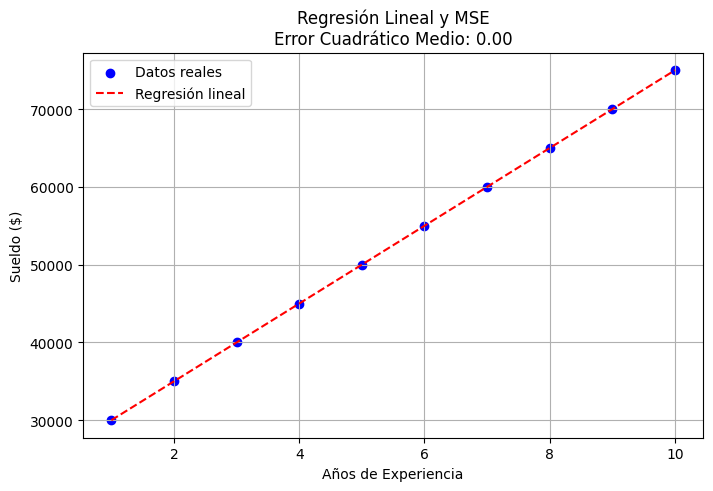

In [6]:
# Visualización del error
plt.figure(figsize=(8, 5))
plt.scatter(experiencia, sueldo, color='blue', label='Datos reales')
plt.plot(experiencia, sueldo_pred_real, color='red', linestyle='dashed', label='Regresión lineal')

# Dibujar las líneas de error
for i in range(len(experiencia)):
    plt.plot([experiencia[i], experiencia[i]], [sueldo[i], sueldo_pred_real[i]], 'k--', alpha=0.6)

plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo ($)')
plt.title(f'Regresión Lineal y MSE\nError Cuadrático Medio: {mse:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Generar datos más dispersos
np.random.seed(42)  # Para reproducibilidad
experiencia_ext = np.arange(1, 21).reshape(-1, 1)  # Años de experiencia de 1 a 20
sueldo_ext = 30000 + 2500 * experiencia_ext.flatten() + np.random.normal(0, 10000, size=len(experiencia_ext))  # Agregando ruido

In [8]:
# Crear y entrenar el nuevo modelo
modelo_ext = LinearRegression()
modelo_ext.fit(experiencia_ext, sueldo_ext)

# Predicciones con el nuevo modelo
sueldo_pred_ext = modelo_ext.predict(experiencia_ext)

# Cálculo del Error Cuadrático Medio (MSE)
mse_ext = mean_squared_error(sueldo_ext, sueldo_pred_ext)


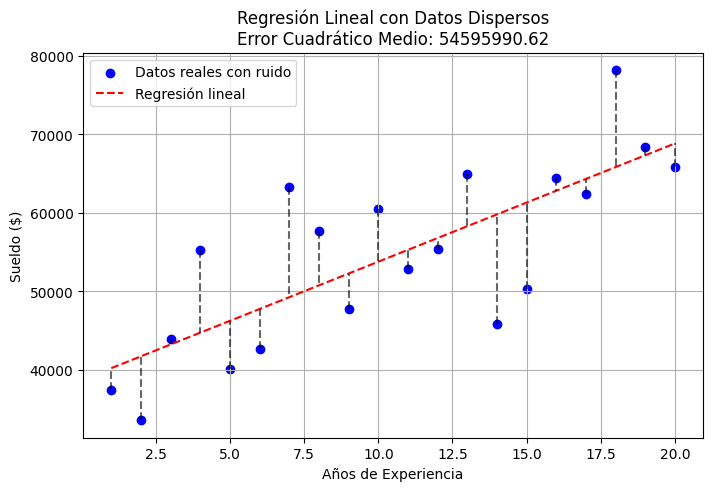

In [9]:
# Visualización del nuevo conjunto de datos con la regresión lineal y errores
plt.figure(figsize=(8, 5))
plt.scatter(experiencia_ext, sueldo_ext, color='blue', label='Datos reales con ruido')
plt.plot(experiencia_ext, sueldo_pred_ext, color='red', linestyle='dashed', label='Regresión lineal')

# Dibujar las líneas de error
for i in range(len(experiencia_ext)):
    plt.plot([experiencia_ext[i], experiencia_ext[i]], [sueldo_ext[i], sueldo_pred_ext[i]], 'k--', alpha=0.6)

plt.xlabel('Años de Experiencia')
plt.ylabel('Sueldo ($)')
plt.title(f'Regresión Lineal con Datos Dispersos\nError Cuadrático Medio: {mse_ext:.2f}')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Cálculo del coeficiente de determinación (R^2) para el primer ejemplo
r2_score_simple = modelo.score(experiencia, sueldo)

# Cálculo del coeficiente de determinación (R^2) para el segundo ejemplo con datos dispersos
r2_score_ext = modelo_ext.score(experiencia_ext, sueldo_ext)

r2_score_simple, r2_score_ext

(1.0, 0.5795239251873523)

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Aplicar estandarización (Z-score normalization)
scaler_standard = StandardScaler()
experiencia_ext_std = scaler_standard.fit_transform(experiencia_ext)
sueldo_ext_std = scaler_standard.fit_transform(sueldo_ext.reshape(-1, 1)).flatten()

# Aplicar normalización (Min-Max scaling)
scaler_minmax = MinMaxScaler()
experiencia_ext_minmax = scaler_minmax.fit_transform(experiencia_ext)
sueldo_ext_minmax = scaler_minmax.fit_transform(sueldo_ext.reshape(-1, 1)).flatten()


In [12]:
# Crear y entrenar modelos con datos estandarizados y normalizados
modelo_std = LinearRegression().fit(experiencia_ext_std, sueldo_ext_std)
modelo_minmax = LinearRegression().fit(experiencia_ext_minmax, sueldo_ext_minmax)

# Predicciones con los modelos ajustados
sueldo_pred_std = modelo_std.predict(experiencia_ext_std)
sueldo_pred_minmax = modelo_minmax.predict(experiencia_ext_minmax)

# Cálculo del Error Cuadrático Medio (MSE) para cada técnica
mse_std = mean_squared_error(sueldo_ext_std, sueldo_pred_std)
mse_minmax = mean_squared_error(sueldo_ext_minmax, sueldo_pred_minmax)


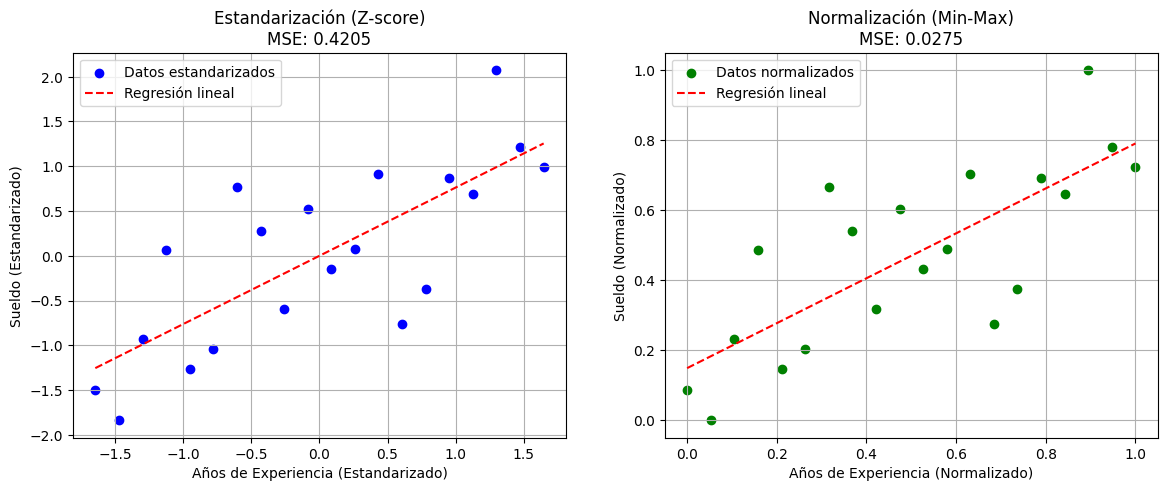

In [13]:
# Graficar resultados
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica para estandarización
axs[0].scatter(experiencia_ext_std, sueldo_ext_std, color='blue', label='Datos estandarizados')
axs[0].plot(experiencia_ext_std, sueldo_pred_std, color='red', linestyle='dashed', label='Regresión lineal')
axs[0].set_xlabel('Años de Experiencia (Estandarizado)')
axs[0].set_ylabel('Sueldo (Estandarizado)')
axs[0].set_title(f'Estandarización (Z-score)\nMSE: {mse_std:.4f}')
axs[0].legend()
axs[0].grid(True)

# Gráfica para normalización
axs[1].scatter(experiencia_ext_minmax, sueldo_ext_minmax, color='green', label='Datos normalizados')
axs[1].plot(experiencia_ext_minmax, sueldo_pred_minmax, color='red', linestyle='dashed', label='Regresión lineal')
axs[1].set_xlabel('Años de Experiencia (Normalizado)')
axs[1].set_ylabel('Sueldo (Normalizado)')
axs[1].set_title(f'Normalización (Min-Max)\nMSE: {mse_minmax:.4f}')
axs[1].legend()
axs[1].grid(True)

plt.show()
